# `By - Yuvraj Gupta`

# `DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP`


# `Task 1 : `Prediction Using Supervised ML`

## PART 1:

### `Importing the necessary libraries`

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### `Inserting the given dataset`

In [2]:
link="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(link)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### `Analysing the dataset using EDA`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.shape

(25, 2)

In [7]:
df.describe()                     # description of dataset in 5 point summary format

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### `Visualization of patterns of variables using line plot`

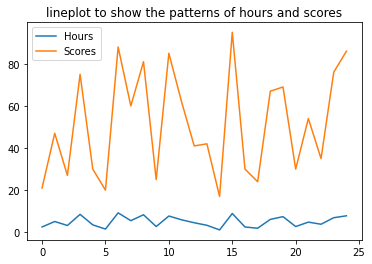

In [8]:
df.plot(kind="line")
plt.title("lineplot to show the patterns of hours and scores")


plt.show()

### `Visualization of pattern using scatter plot`

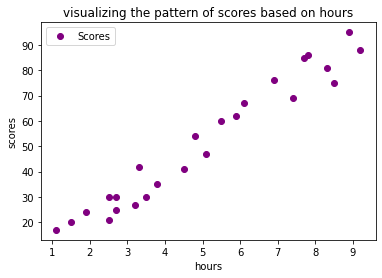

In [9]:
df.plot(x="Hours",y="Scores",style="o",color="purple")
plt.title("visualizing the pattern of scores based on hours")
plt.xlabel("hours")
plt.ylabel("scores")
plt.show()

### `Visualization using regression plot`

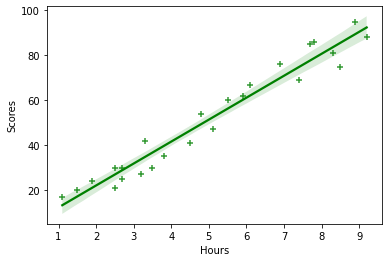

In [10]:
ax=sns.regplot(x="Hours",y="Scores",data=df, color="green", marker="+")

### `Visualizing outliers in 'Hours' column using box plot`

<Axes: xlabel='Hours'>

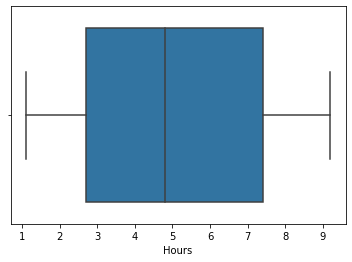

In [11]:
sns.boxplot(x=df["Hours"])

### `Visualizing outliers in 'Scores' column using box plot`

<Axes: xlabel='Scores'>

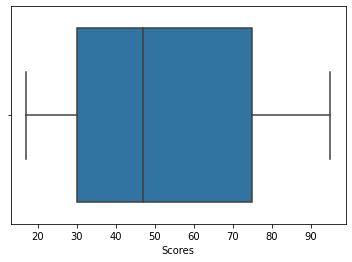

In [12]:
sns.boxplot(x=df["Scores"])

### `Checking correlation between features using heatmap`

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


<Axes: >

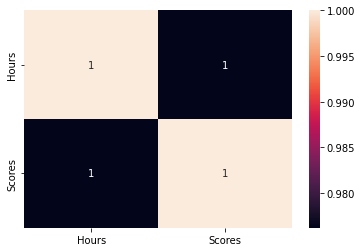

In [13]:
print(df.corr())
sns.heatmap(df.corr(),annot=True,fmt=".1g")

### `Applied supervised ML algorithm : Simple Linear Regression[SLR]`

                As our given dataset here consists of only two variables namely 'Hours' and 'Scores', so we need to apply 
                Simple Linear Regression model. We assign 'Hours' as independent or predictor variable and 'Scores' as 
                dependent or target variable. 

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [15]:
x=df[["Hours"]]
y=df[["Scores"]]


### `Splitting the whole dataset into train and test categories`

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)
y_test1= np.array(y_test)


### `Training the model `

In [25]:
lm = LinearRegression(fit_intercept=False)

lm.fit(x_train, y_train)
print("Model fitting is completed.")

Model fitting is completed.


In [18]:
print(lm.intercept_)
print(lm.coef_)

[2.37081538]
[[9.78856669]]


Our fitted model is 
         Scores_predicted =   2.37081538 + 9.7885669 * Hours

### `Visualizing the fitted curve along with the data points`

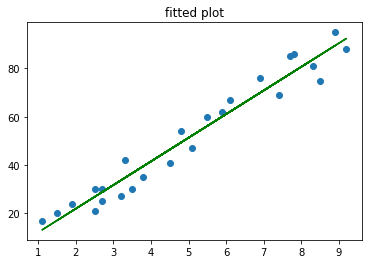

In [19]:
line=lm.intercept_+lm.coef_*x

plt.scatter(x,y)
plt.plot(x,line,color="green")
plt.title("fitted plot")
plt.show()

### `Prediction using the fitted model`

In [20]:
yhat=lm.predict(x_test)
yhat

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [21]:
df1 = pd.DataFrame({'Initial value of scores' : [20,27,69,30,62,35,24,86] , 'Predicted value': [17.05366541,33.69422878,74.80620886,26.8422321,60.12335883,39.56736879,20.96909209,78.72163554]})
df1

,Initial value of scores,Predicted value
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [22]:
print("The value of R^2 for our model is: ", lm.score(x_train,y_train))

The value of R^2 for our model is:  0.9484997422695115


As the value of R^2 for our fitted regression model is 0.9484997422695115, i.e, close to 1 so our prediction is  good.

***
## PART 2:

Given the study hours of a student  =  9.25 hours per day. We now need to predict the score based on this given value using our previously fitted model.

In [28]:
given_hour = 9.25
test = np.array([given_hour])
test = test.reshape(-1, 1)
score_prediction = lm.predict(test)
print("The given study hours: {}".format(given_hour))
print("predicted score: {}".format(score_prediction[0]))


The given study hours: 9.25
predicted score: [93.91593554]


# `Thanks`